In [33]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
df = pd.read_csv("Traffic.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2976, 9)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [37]:
df.info()
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB

Missing values:
 Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


In [43]:
data = pd.read_csv('Traffic.csv')

<Axes: xlabel='Day of the week', ylabel='Count'>

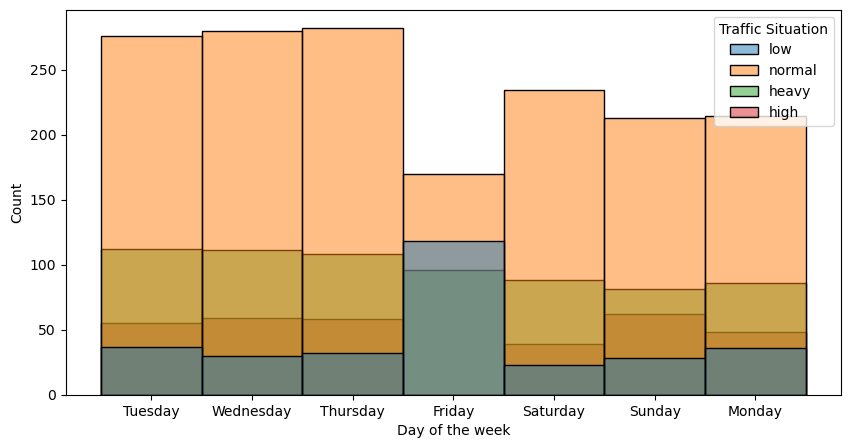

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="Day of the week", hue="Traffic Situation")

<Axes: xlabel='Date', ylabel='Count'>

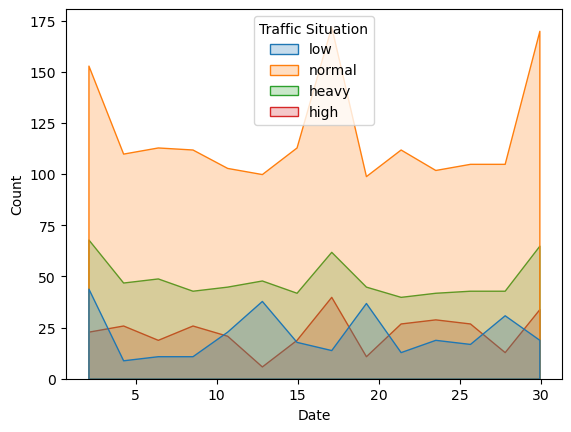

In [47]:
sns.histplot(data, x="Date", hue="Traffic Situation", element="poly")

<Axes: xlabel='Total', ylabel='Count'>

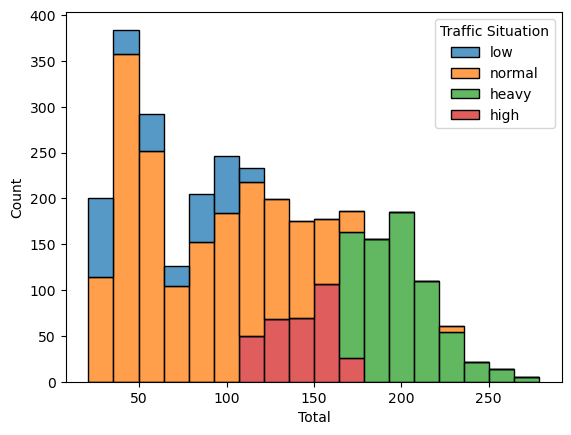

In [49]:
sns.histplot(data=data, x="Total", hue="Traffic Situation", multiple="stack")

In [51]:
X = df.drop(['Traffic Situation'], axis=1)
y = df['Traffic Situation']



In [53]:
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


y = le.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (2380, 8) Test shape: (596, 8)


In [55]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE - Train shape:", X_train_res.shape)
print("Class distribution after SMOTE:\n", pd.Series(y_train_res).value_counts())

After SMOTE - Train shape: (5316, 8)
Class distribution after SMOTE:
 2    1329
0    1329
3    1329
1    1329
Name: count, dtype: int64


In [57]:
print(pd.Series(y_train_res).value_counts())

2    1329
0    1329
3    1329
1    1329
Name: count, dtype: int64


In [59]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
rf_pred = rf.predict(X_test)
print("\n Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


 Random Forest Accuracy: 0.9899328859060402
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       0.97      0.97      0.97        63
           2       1.00      1.00      1.00        66
           3       0.99      0.99      0.99       340

    accuracy                           0.99       596
   macro avg       0.99      0.99      0.99       596
weighted avg       0.99      0.99      0.99       596



In [60]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
lr_pred = lr.predict(X_test)
print("\n Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


 Logistic Regression Accuracy: 0.8439597315436241
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       127
           1       0.60      0.94      0.73        63
           2       0.60      0.94      0.73        66
           3       0.97      0.75      0.85       340

    accuracy                           0.84       596
   macro avg       0.78      0.91      0.82       596
weighted avg       0.89      0.84      0.85       596



In [61]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
dt_pred = dt.predict(X_test)
print("\n Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))




 Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00       340

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



In [62]:
#XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_res, y_train_res)
xgb_pred = xgb.predict(X_test)
print("\n XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))



C:\Users\Rohan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:33:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 XGBoost Accuracy: 0.9932885906040269
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       0.97      1.00      0.98        63
           2       1.00      1.00      1.00        66
           3       1.00      0.99      0.99       340

    accuracy                           0.99       596
   macro avg       0.99      1.00      0.99       596
weighted avg       0.99      0.99      0.99       596



In [66]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("\n KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


 KNN Accuracy: 0.8976510067114094
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       127
           1       0.89      0.75      0.81        63
           2       0.86      0.74      0.80        66
           3       0.93      0.93      0.93       340

    accuracy                           0.90       596
   macro avg       0.88      0.85      0.86       596
weighted avg       0.90      0.90      0.90       596



In [67]:
model_preds = {
    "Random Forest": rf_pred,
    "Logistic Regression": lr_pred,
    "Decision Tree": dt_pred,
    "XGBoost": xgb_pred,
    "KNN": knn_pred
}

In [71]:
results = {name: accuracy_score(y_test, preds) for name, preds in model_preds.items()}
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("\n Model Accuracy Comparison:")
print(results_df.sort_values(by="Accuracy", ascending=False))


 Model Accuracy Comparison:
                 Model  Accuracy
2        Decision Tree  1.000000
3              XGBoost  0.993289
0        Random Forest  0.989933
4                  KNN  0.897651
1  Logistic Regression  0.843960


In [73]:
!pip install tensorflow

Epoch 1/20


C:\Users\Rohan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5903 - loss: 1.0501 - val_accuracy: 0.7647 - val_loss: 0.6935
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7868 - loss: 0.6042 - val_accuracy: 0.8256 - val_loss: 0.4761
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8451 - loss: 0.4505 - val_accuracy: 0.8676 - val_loss: 0.3742
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8808 - loss: 0.3682 - val_accuracy: 0.8739 - val_loss: 0.3289
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8855 - loss: 0.3266 - val_accuracy: 0.9118 - val_loss: 0.2855
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9007 - loss: 0.2895 - val_accuracy: 0.9160 - val_loss: 0.2734
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9002 - loss: 0.2703 - val_accuracy: 0.9244 - val_loss: 0.2483
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9149 - loss: 0.2490 - val_accuracy: 0.9244 - val_loss: 0.2300
Epo

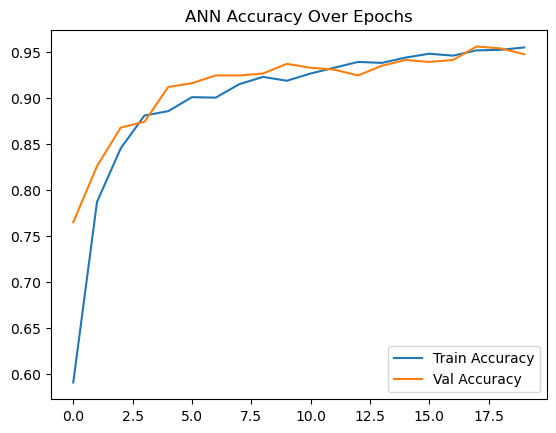

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[es])

loss, acc = model.evaluate(X_test, y_test)
print("\nANN Test Accuracy:", acc)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("ANN Accuracy Over Epochs")
plt.show()
